# Testiranje...

Importamo potrebne knjižnice.

In [2]:
import nltk
from urllib.request import urlopen
from bs4 import BeautifulSoup
from selenium import webdriver
import time


Spodaj je funkcija, ki prejme url in vrne sprasano telo novice.

In [3]:
def parse_url(url):
    try:
        driver = webdriver.Chrome('..\\webdriver\\chromedriver.exe')
        driver.get(url)
        button = driver.find_element_by_class_name('comment-show-hide')
        #webdriver.ActionChains(driver).move_to_element(button).click(button).perform()
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        button.click()
        time.sleep(1)
        html = driver.execute_script("return document.getElementsByTagName('html')[0].innerHTML")
        #html = driver.page_source
        #print(html)
        driver.close()
        
        soup = BeautifulSoup(html, 'html.parser')
        newsContents = soup.find_all("div", id="newsbody")[0].find_all("p")
        parsed = ""
        
        #print(html)
        
        comments = soup.find_all("div", class_="newscomments")[0].find_all("dt", class_="ds2")
        #print("QWE: " + comments.get_text())
        for p in newsContents: 
            parsed += p.get_text() + " "
        title = soup.find_all("h1")[0].get_text()
        parsed_comments = [c.get_text() for c in comments]
        return parsed, title, parsed_comments
    except:
        print("Error url: " + url)
        return "", "", ""

Test klica funkcije.

In [4]:
parse_url("http://www.rtvslo.si/svet/bliznji-vzhod/smrt-ameriki-iranci-protestirajo-proti-novim-sankcijam/470795")

('Več tisoč Irancev se je na obletnico zajetja ameriškega veleposlaništva in talcev med islamsko revolucijo leta 1979 zbralo na ulicah, kjer protestirajo tudi proti novim ameriškim sankcijam. Protestniki so v prestolnici Teheran pred prostori nekdanjega ameriškega veleposlaništva prepevali "smrt Ameriki" in sežigali ameriške zastave in fotografije predsednika Donalda Trumpa. "Iranski narod bo pokazal, da je gospod Trump premajhen, da bi spravil Iran na kolena," je po poročanju Associated Pressa na shodu dejal predsednik iranskega parlamenta Ali Laridžani. Proteste v organizaciji vlade neposredno prenašajo iranski državni mediji, ki poročajo, da se je v različnih krajih po Iranu zbralo več milijonov ljudi. Protestniki naj bi tudi prisegli zvestobo oblastem in vrhovnemu voditelju ajatoli Aliju Hameneju. Nasprotovanje sankcijam sovpada z obletnico islamske revolucije. 4. novembra 1979, kmalu po odstavitvi iranskega šaha Mohameda Reze Pahlavija, ki je užival podporo ZDA, so iranski študent

Naredimo še funkcijo, ki s pomočjo Rtvslo iskalnika vrne vse povezave do najdenih novic.

In [5]:
def get_urls(query, num_of_pages=1):
    urls = []
    for i in range(num_of_pages):
        html = urlopen("http://www.rtvslo.si/iskalnik?q=" + query + "&page=" + str(i)).read() 
        soup = BeautifulSoup(html, 'html.parser')
        for news in soup.find_all("div", class_="stitle"):
            urls.append("http://www.rtvslo.si" + news.a["href"])
    return urls

In [6]:
get_urls("trump", 2)

['http://www.rtvslo.si/svet/trump-macronov-poziv-po-evropski-vojski-oznacil-za-zaljivega/471385',
 'http://www.rtvslo.si/svet/alexandria-ocasio-cortez-socialistka-najmlajsa-kongresnica-nova-zvezda-demokratov/471379',
 'http://www.rtvslo.si/capodistria/radio-capodistria/notizie/mondo/trump-limita-il-diritto-di-asilo/471375',
 'http://www.rtvslo.si/zabava/iz-sveta-znanih/ashton-kutcher-praznoval-v-baru-kjer-se-je-zgodil-krvavi-strelski-pohod/471373',
 'http://www.rtvslo.si/svet/trumpov-generalni-tozilec-povezan-s-podjetjem-ki-je-veterane-opeharilo-za-prihranke/471372',
 'http://www.rtvslo.si/svet/pozari-v-kaliforniji-se-sirijo-devet-mrtvih-stevilne-pogresajo/471366',
 'http://www.rtvslo.si/zabava/glasba/korejska-senzacija-bts-ob-nastop-zaradi-sporne-majice/471324',
 'http://www.rtvslo.si/capodistria/radio-capodistria/notizie/mondo/usa-un-giudice-del-montana-blocca-l-oleodotto-di-trump-keystone-xl/471291',
 'http://www.rtvslo.si/prva-svetovna-vojna/spomin-je-ziv/ce-je-prva-svetovna-vojna-

Definiramo seznam novic, ki bi jih radi sparsali.

Za vsako novico kličemo prvo metodo.

In [7]:
#urls = ["http://www.rtvslo.si/svet/s-in-j-amerika/trump-bi-prebeznikom-preprecil-vstop-v-zda-kar-z-izvrsnim-ukazom/470009",
#       "http://www.rtvslo.si/svet/s-in-j-amerika/trump-po-bombnih-posiljkah-poudarja-medijsko-sovraznost-paket-tudi-de-niru-in-bidnu/469952",
#       "http://www.rtvslo.si/svet/s-in-j-amerika/trump-govori-o-invaziji-na-zda-in-na-mejo-posilja-5-200-vojakov/470369",
#       "http://www.rtvslo.si/svet/s-in-j-amerika/trump-kljub-nasprotovanju-obiskal-prizorisce-strelskega-napada-v-pittsburghu/470503",
#       "http://www.rtvslo.si/svet/s-in-j-amerika/fbi-v-povezavi-z-bombnimi-posiljkami-trumpovim-kritikom-aretiral-osumljenca/470029"]
urls = get_urls("trump", 2)
parsed_news = []
for url in urls:
    parsed, title, comments = parse_url(url)
    if parsed != "":
        parsed_news.append((title, parsed, comments))
parsed_news

Error url: http://www.rtvslo.si/capodistria/radio-capodistria/notizie/mondo/trump-limita-il-diritto-di-asilo/471375
Error url: http://www.rtvslo.si/capodistria/radio-capodistria/notizie/mondo/usa-un-giudice-del-montana-blocca-l-oleodotto-di-trump-keystone-xl/471291
Error url: http://www.rtvslo.si/prva-svetovna-vojna/spomin-je-ziv/ce-je-prva-svetovna-vojna-predvsem-razdirala-spomin-nanjo-zdruzuje/471259
Error url: http://www.rtvslo.si/capodistria/radio-capodistria/notizie/mondo/cina-provvede-per-tempo-alle-nuove-sanzioni-americane-imposte-all-iran-per-colpire-le-sue-esportazioni-petrolifere/471164
Error url: http://www.rtvslo.si/capodistria/radio-capodistria/notizie/mondo/stati-uniti-il-ministro-della-giustizia-si-dimette-su-ordine-di-donald-trump/471136
Error url: http://www.rtvslo.si/radio-si/second-hand-7-10-11-rolling-stone-the-100-greatest-songs-of-the-century-so-far-sample-check-11-20/471111
Error url: http://www.rtvslo.si/capodistria/radio-capodistria/notizie/mondo/trump-non-si-f

[('Trump Macronov poziv po evropski vojski označil za "žaljivega"',
  'Ameriški predsednik ZDA Donald Trump je prispel v Pariz, kjer se bo ta konec tedna udeležil slovesnosti ob stoti obletnici konca prve svetovne vojne. A njegov tokratni obisk je že zdaj precej bolj napet, kot je bil tisti lani poleti, ko je prvi par Francije gostil prvi par ZDA na francoskem državnem prazniku in je četverica veselo pozirala na večerji v luskuzni restavraciji v Eifflovem stolpu. Trump je tudi tokrat v Pariz prispel s prvo damo Melanio, s katero se bosta skupaj z drugimi svetovnimi voditelji ta konec tedna udeležila slovesnosti ob koncu druge svetovne vojne. A že ob prihodu je Trump ostro kritiziral predlog svojega gostitelja, francoskega predsednika Emmanuela Macrona, za ustanovitev skupne evropske vojske, s katero bi se Evropa lahko branila med drugim tudi pred ZDA. "Francoski predsednik Macron je pravkar predlagal, da mora Evropa ustanoviti lastno vojsko, da bi se zaščitila pred ZDA, Kitajsko in Rus

In [70]:
def write_to_file():
    f = open("../data/novice.txt", "w", encoding="utf-8")
    for title, parsed, comments in parsed_news:
        f.write(title + "\n")
        f.write(parsed + "\n")
        for c in comments:
            f.write(c.replace("\n", " ") + "\n")
        f.write("\n")
        
def read_from_file():
    data = []
    f = open("../data/novice.txt", "r", encoding="utf-8")
    title = ""
    body = ""
    comments = []
    for line in f:
        line = line.replace("\n", "")
        if line == "":
            data.append( (title, body, comments) )
            title = ""
            body = ""
            comments = []
        elif title == "":
            title = line
        elif body == "":
            body = line
        else:
            comments.append(line)
    return data

In [71]:
#write_to_file()
data = read_from_file()
print(data[5])

('Korejska senzacija BTS ob nastop zaradi sporne majice', 'Nastop svetovno znane južnokorejske popskupine BTS v japonski televizijski oddaji je televizija Asahi odpovedala tik pred zdajci. Razlog za to je bila "modna" napaka, ki jo je eden od članov zagrešil že pred časom. Fotografija Jimina, enega od članov fantovske zasedbe, na kateri nosi majico z upodobitvijo eksplozije jedrske bombe, se je na spletu prvič pojavila oktobra, kmalu pa je povzročila razburjenje med oboževalci skupine, ki so jo označili za žalitev. Na majici so bili ob fotografiji eksplozije in bombe tudi slogani, ki pozivajo h korejski neodvisnosti. Nekateri so po poročanju britanskega BBC-ja natis na majici razumeli kot hvalospev eksploziji, ki je vodila v kapitulacijo Japonske med drugo svetovno vojno, nato pa tudi v neodvisnost Korejskega polotoka, ki je bil dotlej pod japonsko okupacijo.  Ker so številni oboževalci BTS nošenje sporne majice označili za nedopustno, se je televizija Asahi odločila, da bo nastop prel

Klic programa za lematizacijo.

0: uspešno

1: neuspešno

In [8]:
import os
f = open("../ObeliksLatest/input.txt", "w", encoding="utf-8")
for news in parsed_news:
    f.write(news[1] + "\n\n")
f.close()
os.chdir("../ObeliksLatest")
#system("mkdir juhu")
os.system("PosTaggerTag -lem:LemmatizerModel.bin -v -o -t input.txt TaggerModel.bin out.xml")

0

Branje lematiziranih besed.

In [9]:
f  = open("../ObeliksLatest/out.xml", "r", encoding="utf-8").read()
soup = BeautifulSoup(f, "lxml")
lemmatized = []
lemmas = soup.find_all("p")
for i in range(0, len(lemmas), 1):
    lem = []
    for l in lemmas[i].find_all("w"):
        lem.append(l["lemma"])
    lemmatized.append(lem)
print(lemmatized)

[['ameriški', 'predsednik', 'ZDA', 'Donald', 'Trump', 'biti', 'prispeti', 'v', 'Pariz', 'kjer', 'se', 'biti', 'ta', 'konec', 'teden', 'udeležiti', 'slovesnost', 'ob', 'stoti', 'obletnica', 'konec', 'prvi', 'svetoven', 'vojna', 'a', 'njegov', 'tokraten', 'obisk', 'biti', 'že', 'zdaj', 'precej', 'bolj', 'napet', 'kot', 'biti', 'biti', 'tisti', 'lani', 'poleti', 'ko', 'biti', 'prvi', 'par', 'Francija', 'gostiti', 'prvi', 'par', 'ZDA', 'na', 'francoski', 'državen', 'praznik', 'in', 'biti', 'četverica', 'veselo', 'pozirati', 'na', 'večerja', 'v', 'luskuzen', 'restavracija', 'v', 'Eifflov', 'stolp', 'Trump', 'biti', 'tudi', 'tokrat', 'v', 'Pariz', 'prispeti', 'z', 'prvi', 'dama', 'Melanio', 'z', 'kateri', 'se', 'biti', 'skupaj', 'z', 'drug', 'svetoven', 'voditelj', 'ta', 'konec', 'teden', 'udeležiti', 'slovesnost', 'ob', 'konec', 'drug', 'svetoven', 'vojna', 'a', 'že', 'ob', 'prihod', 'biti', 'Trump', 'ostro', 'kritizirati', 'predlog', 'svoj', 'gostitelj', 'francoski', 'predsednik', 'Emmanue

In [10]:
import re
def tokenize(text):
    # First tokenize by sentence, then by word to ensure that punctuation is caught as it's own token.
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # Filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation).
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [29]:
def character_ngram(text):
    n = 3
    result = []
    text = text.lower().replace(".", "").replace(",", "").replace("?", "").replace("!","")
    #text = text.replace(" ", "")
    for i in range(len(text)-n+1):
        result.append(text[i:i+n])
    return result

In [31]:
text = "Janez si umiva zobe. Potem pa bo šel gledat risanke. Mislim, da je na sporedu čarobni Bakugan iz vesolja."
#tokenize(text)
character_ngram(text)

['jan',
 'ane',
 'nez',
 'ez ',
 'z s',
 ' si',
 'si ',
 'i u',
 ' um',
 'umi',
 'miv',
 'iva',
 'va ',
 'a z',
 ' zo',
 'zob',
 'obe',
 'be ',
 'e p',
 ' po',
 'pot',
 'ote',
 'tem',
 'em ',
 'm p',
 ' pa',
 'pa ',
 'a b',
 ' bo',
 'bo ',
 'o š',
 ' še',
 'šel',
 'el ',
 'l g',
 ' gl',
 'gle',
 'led',
 'eda',
 'dat',
 'at ',
 't r',
 ' ri',
 'ris',
 'isa',
 'san',
 'ank',
 'nke',
 'ke ',
 'e m',
 ' mi',
 'mis',
 'isl',
 'sli',
 'lim',
 'im ',
 'm d',
 ' da',
 'da ',
 'a j',
 ' je',
 'je ',
 'e n',
 ' na',
 'na ',
 'a s',
 ' sp',
 'spo',
 'por',
 'ore',
 'red',
 'edu',
 'du ',
 'u č',
 ' ča',
 'čar',
 'aro',
 'rob',
 'obn',
 'bni',
 'ni ',
 'i b',
 ' ba',
 'bak',
 'aku',
 'kug',
 'uga',
 'gan',
 'an ',
 'n i',
 ' iz',
 'iz ',
 'z v',
 ' ve',
 'ves',
 'eso',
 'sol',
 'olj',
 'lja']

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(
                        max_df=0.8, 
                        max_features=200000,
                        min_df=0.2, 
                        stop_words='english', 
                        use_idf=True, 
                        tokenizer=character_ngram, 
                        ngram_range=(1,3))

# Fit the vectorizer to synopses texts
#news_text = [text for _,text in parsed_news]
news_text = []
news_titles = [title for title,_,_ in parsed_news]
#news_titles = ['http://www.rtvslo.si/zabava/glasba/rihanna-ostro-proti-temu-da-trump-predvaja-njene-pesmi/471005',
 #'http://www.rtvslo.si/svet/macron-zeli-evropsko-vojsko-za-obrambo-pred-rusijo-in-zda/470998',
 #'http://www.rtvslo.si/svet/s-in-j-amerika/predsednika-hondurasa-in-gvatemale-zelita-ustaviti-prebeznike/470938',
 #'http://www.rtvslo.si/capodistria/radio-capodistria/notizie/mondo/trump-alla-prova-del-voto-di-meta-mandato/470915',
 #'http://www.rtvslo.si/svet/s-in-j-amerika/trump-mediji-iz-teh-volitev-delajo-referendum-o-meni/470914',
 #'http://www.rtvslo.si/kolumne/ce-z-vajeti-spustis-podivjane-pse-bodo-na-koncu-pogrizeni-vsi/470883',
 #'http://www.rtvslo.si/svet/bliznji-vzhod/hasokdzijeva-sinova-zahtevata-vrnitev-ocetovega-trupla/470861',
 #'http://www.rtvslo.si/svet/bliznji-vzhod/iran-se-ne-bo-uklonil-zda-ponosno-bomo-krsili-sankcije/470821',
 #'http://www.rtvslo.si/svet/s-in-j-amerika/prve-skupine-migrantov-iz-srednje-amerike-prispele-v-ciudad-de-mexico/470811',
 #'http://www.rtvslo.si/capodistria/radio-capodistria/notizie/mondo/scattano-le-nuove-sanzioni-di-trump-contro-l-iran/470809',
 #'http://www.rtvslo.si/svet/bliznji-vzhod/smrt-ameriki-iranci-protestirajo-proti-novim-sankcijam/470795',
 #'http://www.rtvslo.si/svet/s-in-j-amerika/napovedi-konec-prevlade-republikancev-v-kongresu-demokratom-vecina-v-predstavniskem-domu/470594',
 #'http://www.rtvslo.si/gospodarstvo/borzni-komentar/applova-trzna-vrednost-zdrsnila-pod-bilijon-dolarjev/470677',
 #'http://www.rtvslo.si/zabava/iz-sveta-znanih/hugh-jackman-utisal-obozevalce-ki-kritizirajo-njegovo-prijateljstvo-z-ivanko-trump/470740',
 #'http://www.rtvslo.si/radio-si/coming-up/highlights-of-the-week-3-nov-2018/470671',
 #'http://www.rtvslo.si/svet/bliznji-vzhod/v-iranu-stekla-proizvodnja-stoodstotno-domacih-vojaskih-letal/470717',
 #'http://www.rtvslo.si/zabava/iz-sveta-znanih/alec-baldwin-klofnil-mozakarja-ki-mu-je-ukradel-parkirni-prostor/470711',
 #'http://www.rtvslo.si/svet/bliznji-vzhod/erdogan-ukaz-za-umor-hasokdzija-je-prisel-z-vrha-savdske-vlade/470691',
 #'http://www.rtvslo.si/svet/s-in-j-amerika/zda-bodo-iz-sankcij-na-nakup-iranske-nafte-izvzele-osem-drzav/470688',
 #'http://www.rtvslo.si/svet/s-in-j-amerika/brazilija-bo-veleposlanistvo-iz-tel-aviva-preselila-v-jeruzalem/470617',
 #'http://www.rtvslo.si/svet/s-in-j-amerika/trump-grozi-s-streljanjem-na-prebeznike-in-govori-o-sotorskih-mestih/470603',
 #'http://www.rtvslo.si/svet/azija-z-oceanijo/zda-znova-nad-kitajsko-tokrat-zaradi-kraje-intelektualne-lastnine/470548',
 #'http://www.rtvslo.si/zabava/zanimivosti/foto-melania-spremenila-belo-hiso-v-hiso-duhov/470545',
 #'http://www.rtvslo.si/svet/v-zaporu-ubili-razvpitega-gangsterja-jamesa-bulgerja/470505',
 #'http://www.rtvslo.si/svet/s-in-j-amerika/trump-kljub-nasprotovanju-obiskal-prizorisce-strelskega-napada-v-pittsburghu/470503',
 #'http://www.rtvslo.si/zabava/iz-sveta-znanih/kanye-se-z-besedami-izkoristili-so-me-distancira-od-politike/470478',
 #'http://www.rtvslo.si/svet/bliznji-vzhod/nacelni-pragmatizem-eu-ja-v-senci-milijardnih-orozarskih-poslov-s-savdsko-arabijo/470456',
 #'http://www.rtvslo.si/svet/s-in-j-amerika/trump-govori-o-invaziji-na-zda-in-na-mejo-posilja-5-200-vojakov/470369',
 #'http://www.rtvslo.si/na-danasnji-dan/30-oktober-dan-ko-so-americane-prestrasili-wellsovi-marsovci/140187']
for news in lemmatized:
    news_text.append(" ".join([str(x) for x in news]))
print(news_text)
%time tfidf_matrix = tfidf_vectorizer.fit_transform(news_text) 

print("TF-IDF matrix shape: {}".format(tfidf_matrix.shape))
print(tfidf_matrix)

['ameriški predsednik ZDA Donald Trump biti prispeti v Pariz kjer se biti ta konec teden udeležiti slovesnost ob stoti obletnica konec prvi svetoven vojna a njegov tokraten obisk biti že zdaj precej bolj napet kot biti biti tisti lani poleti ko biti prvi par Francija gostiti prvi par ZDA na francoski državen praznik in biti četverica veselo pozirati na večerja v luskuzen restavracija v Eifflov stolp Trump biti tudi tokrat v Pariz prispeti z prvi dama Melanio z kateri se biti skupaj z drug svetoven voditelj ta konec teden udeležiti slovesnost ob konec drug svetoven vojna a že ob prihod biti Trump ostro kritizirati predlog svoj gostitelj francoski predsednik Emmanuel macron za ustanovitev skupen evropski vojska z kateri biti se Evropa lahko braniti med drug tudi pred ZDA francoski predsednik Macron biti pravkar predlagati da morati Evropa ustanoviti lasten vojska da biti se zaščititi pred ZDA Kitajska in Rusija biti tvitniti Trump zelo žaljivo vendar biti morda morati Evropa najprej plač

C:\Users\zigsi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [33]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
dist

array([[-8.88178420e-16,  7.34862726e-01,  8.14626342e-01,
         7.69654370e-01,  7.26343982e-01,  7.39935053e-01,
         7.98364963e-01,  9.09462337e-01,  8.30683822e-01,
         7.68569439e-01,  7.26497084e-01,  7.53989510e-01,
         7.23390053e-01,  8.27970995e-01,  7.40853324e-01,
         7.78801187e-01,  7.91550989e-01,  8.12982518e-01,
         5.18123595e-01,  7.91830007e-01,  8.04847952e-01,
         7.58693207e-01],
       [ 7.34862726e-01, -1.77635684e-15,  7.25296407e-01,
         6.16664794e-01,  6.56502429e-01,  7.14686341e-01,
         6.55482979e-01,  9.00562779e-01,  7.34569505e-01,
         7.03489539e-01,  4.88320445e-01,  5.25936125e-01,
         6.71254497e-01,  6.99024575e-01,  5.85165811e-01,
         4.62539725e-01,  6.41575467e-01,  7.02267421e-01,
         7.25947231e-01,  7.21047841e-01,  4.78574983e-01,
         6.04158290e-01],
       [ 8.14626342e-01,  7.25296407e-01, -5.32907052e-15,
         7.60360910e-01,  7.64801705e-01,  7.92381011e-01,
    

In [34]:
from sklearn.cluster import KMeans

num_clusters = 3
km = KMeans(n_clusters=num_clusters)

# Perform clustering
%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()
print(news_titles)
print("Clusters: {}".format(clusters))

Wall time: 435 ms
['Trump Macronov poziv po evropski vojski označil za "žaljivega"', 'Alexandria Ocasio-Cortez: Socialistka, najmlajša kongresnica, nova zvezda demokratov', 'Ashton Kutcher praznoval v baru, kjer se je zgodil krvavi strelski pohod', 'Trumpov generalni tožilec povezan s podjetjem, ki je veterane opeharilo za prihranke', 'Požari v Kaliforniji se širijo, devet mrtvih, številne pogrešajo', 'Korejska senzacija BTS ob nastop zaradi sporne majice', 'Trumpova administracija prepovedala azil za nezakonite pribežnike', 'Sarah Sanders', 'Pokol v baru v Kaliforniji izvedel 28-letni nekdanji marinec', 'Trump novinarju ukazal, naj vrne mikrofon, in mu prepovedal vstop v Belo hišo', 'Trump: Volilni dan je bil izjemen; Sessions odstopil s položaja', 'V Nevadi na volitvah zmagal že pokojni kralj bordelov', 'Miro Cerar bo v tretje postal očka', "Sinead O'Connor: Nikdar več se nočem družiti z belci", 'Za Wall Street Trump najbolj hvaležen predsednik v 64 letih', 'Demokratom večina v preds

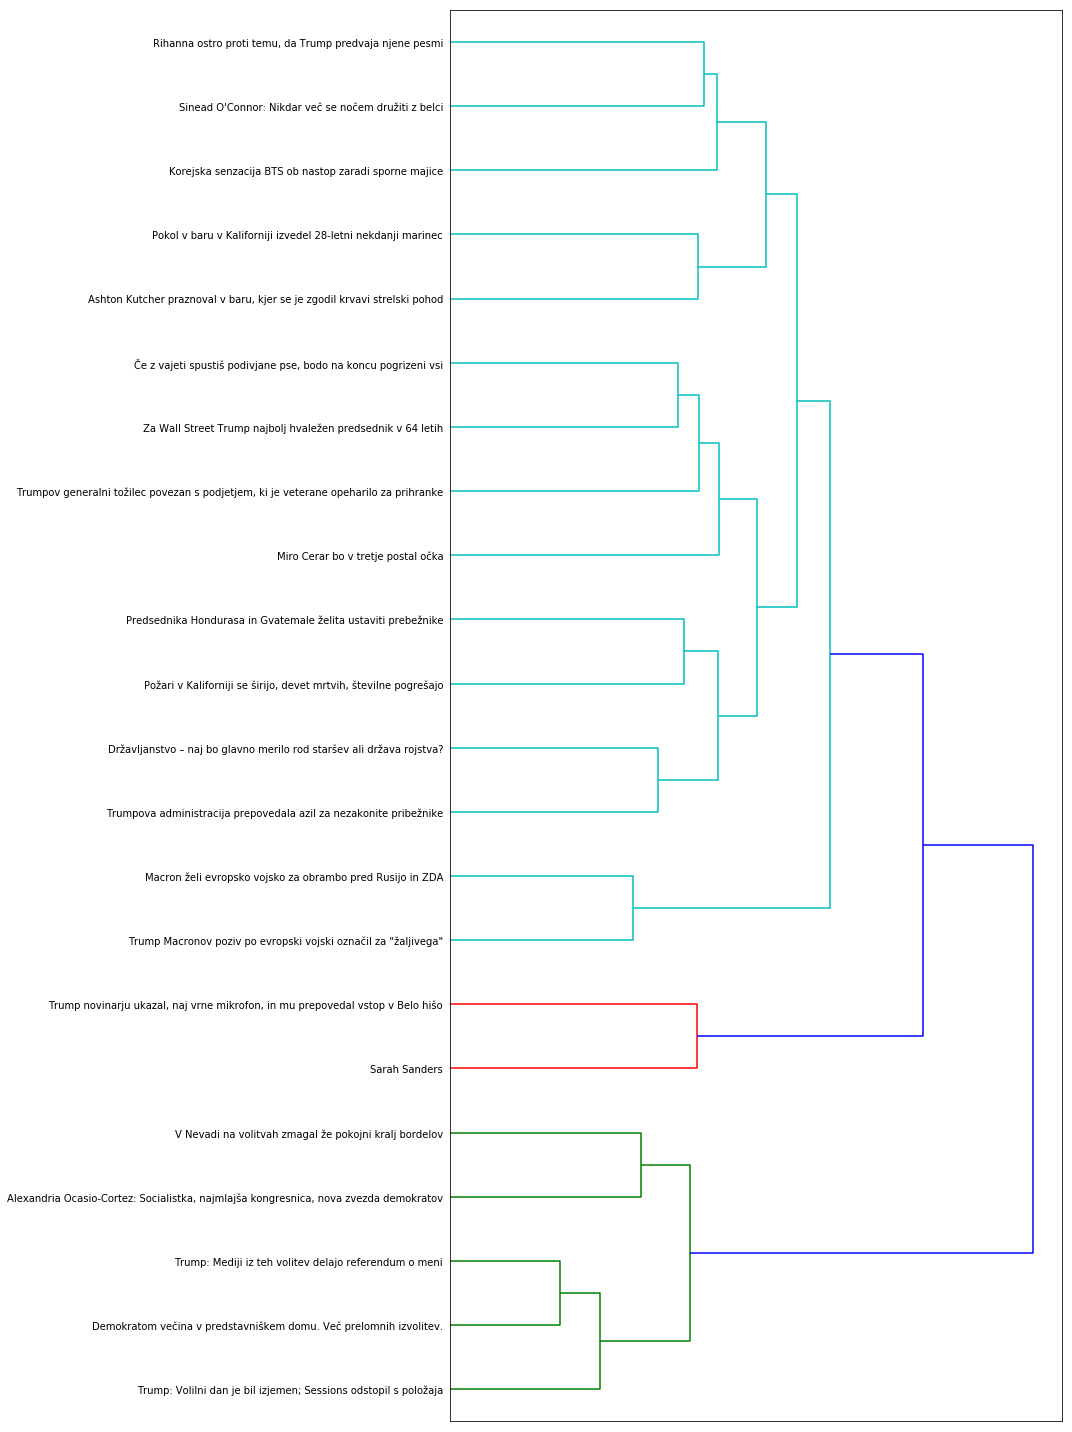

In [35]:
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib.pyplot as plt

# Define the linkage_matrix using ward clustering pre-computed distances.
linkage_matrix = ward(dist) 

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=news_titles);

plt.tick_params(\
    axis= 'x',         # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

# Uncomment the below to show or save the plot.
plt.show()
#plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters
plt.close()